<a href="https://colab.research.google.com/github/jztan93/cs480student/blob/main/05/CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

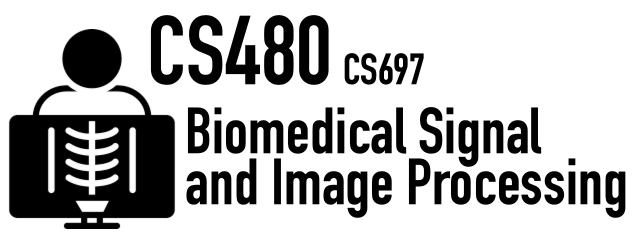
#Assignment 5

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.6MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [4]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [5]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [6]:
# TODO: There are 220 slices altogether! 

In [7]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [8]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

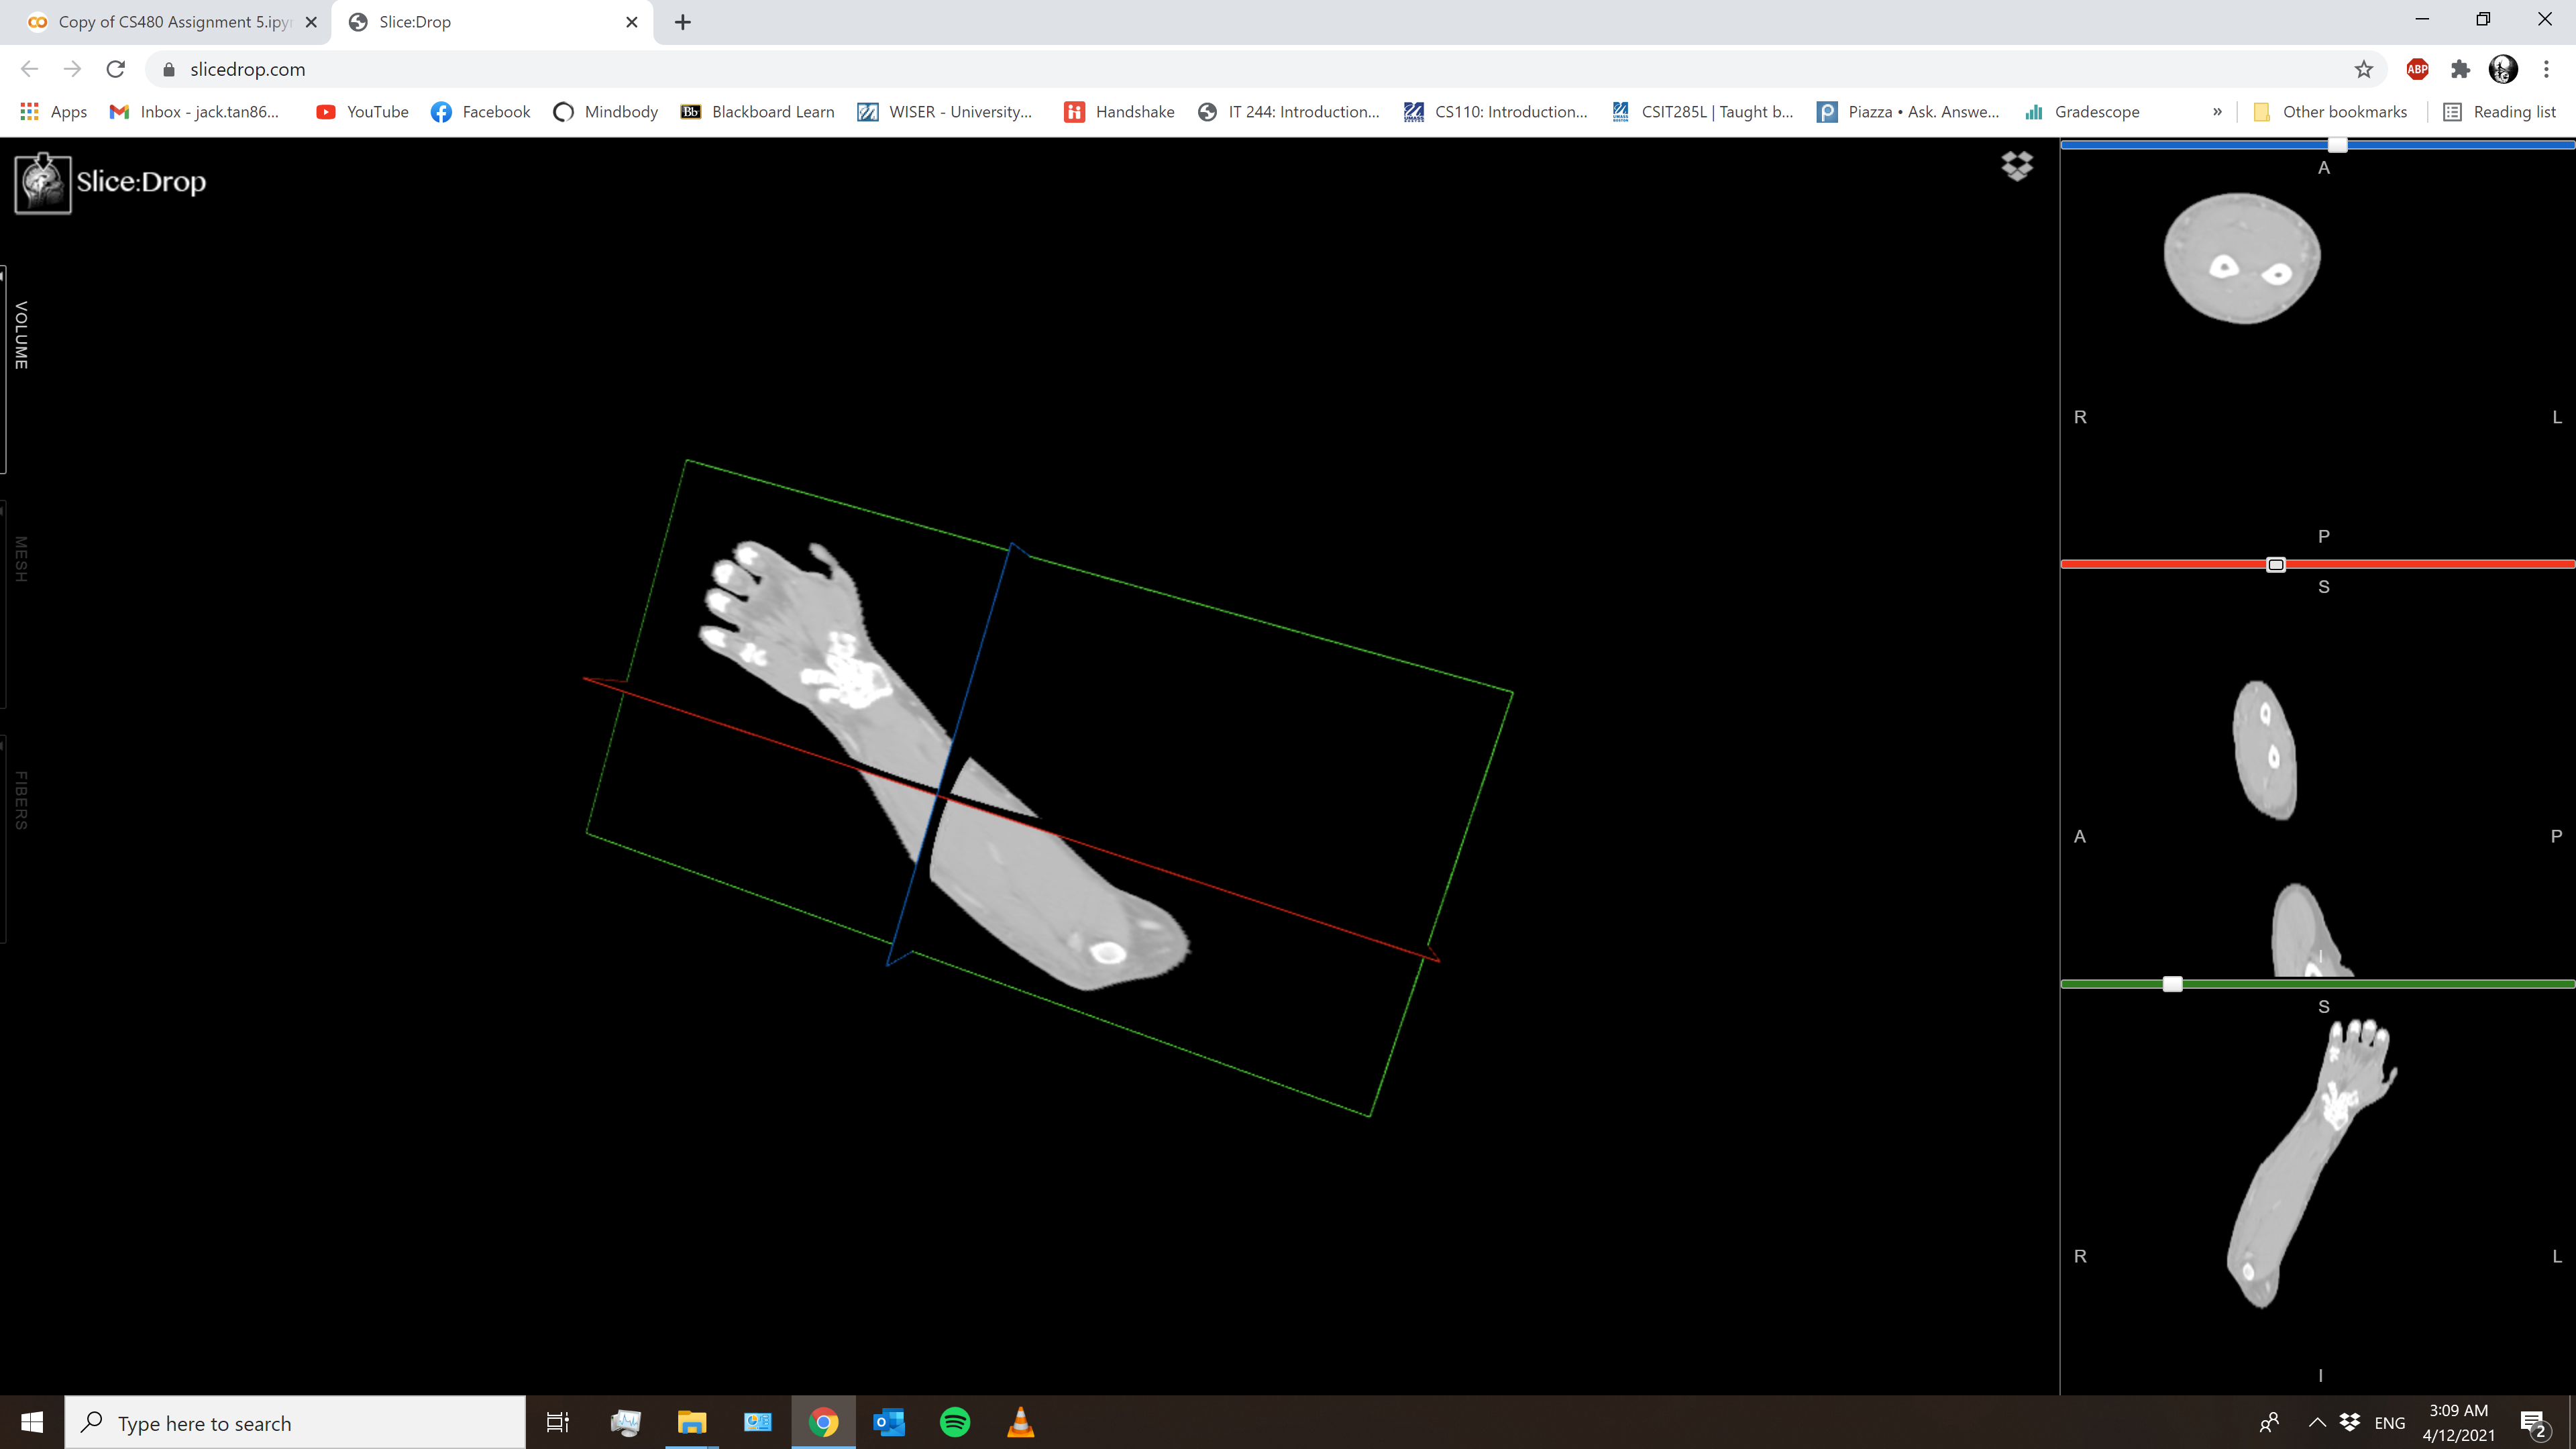

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [9]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [10]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [12]:
from pydicom import dcmread
import os

In [13]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [14]:
# sort the list of filenames
filenames=(sorted(os.listdir("ct")))

# loop through all the filenames
# read each file as a slice and append it to the list "slices"
# which stores a list of all the 2D slices
slices=[]
for i in range(len(filenames)):
  file=dcmread("ct/" + filenames[i])
  slices.append(file)

# get the dimensions of a single slice, returns a 2D value called "shape"
# then append the length of the list itself to turn "shape into 3 dimensions
# create the 3d volume by passing "shape" into numpy.zeros

shape=list(slices[0].pixel_array.shape)
shape.append(len(slices))
volume=numpy.zeros(shape)

# loop through all the 2d slices
# and add the slices 1 by 1 to the 3d volume

for i, slice in enumerate(slices):
  img=slice.pixel_array
  volume[:, :, i]=img


In [15]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [16]:
# TODO: YOUR CODE FOR AXIAL

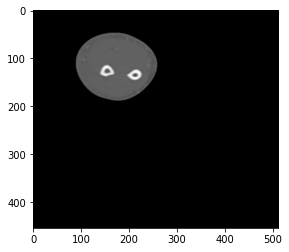

In [17]:
AXIAL = plt.imshow(volume[:, :, 100], cmap='gray')

In [18]:
# TODO: YOUR CODE FOR SAGITTAL

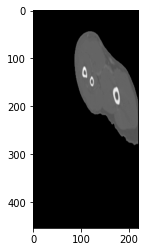

In [19]:
SAGITTAL = plt.imshow(volume[:, 135, :], cmap='gray')

In [20]:
# TODO: YOUR CODE FOR CORONAL

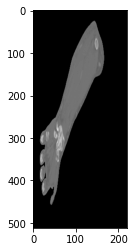

In [21]:
CORONAL = plt.imshow(volume[95, :, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [22]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [23]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [24]:
# TODO: 
slice=dcmread("ct/" + "IM-0001-0110.dcm")

# Window Center
print(slice[0x0028, 0x1050])

# Window Width
print(slice[0x0028, 0x1051])

# Rescale Intercept
print(slice[0x0028, 0x1052])

# Rescale Slope
print(slice[0x0028, 0x1053])

(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
(0028, 1053) Rescale Slope                       DS: "1.0"


In [25]:
pixels=slice.pixel_array
hu_pixels=(pixels*1.0)

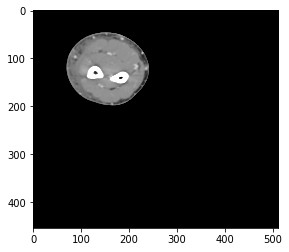

In [26]:
level=30
window=410
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels - 1024.0, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [27]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

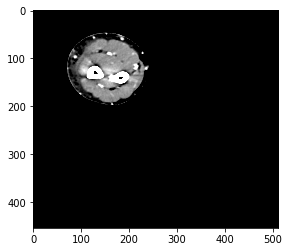

In [28]:
# TODO: YOUR CODE
level=50
window=100
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

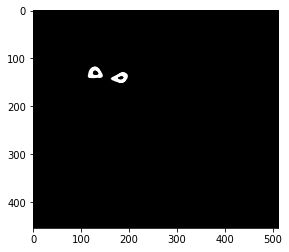

In [29]:
# TODO: YOUR CODE
level=500
window=600
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

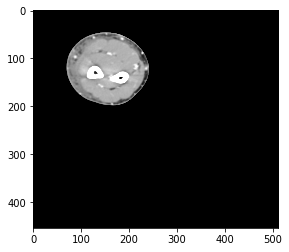

In [30]:
# TODO: YOUR CODE
level=0
window=300
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

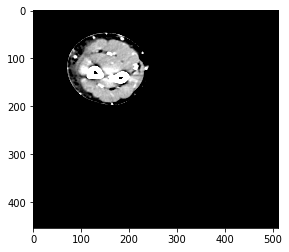

In [31]:
# TODO: YOUR CODE
level=40
window=80
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

In [32]:
# Which values make sense and why?

I tried many different values, some of which came from the windows we've discussed in class. At the end of the day, I think what makes the most sense all depends on what we are trying to image and what compromises we have to make to get the results we want. 

If we just want to see bones, then I think the window that is optimized for bones (level=500, window=600) is best since it allows us to see all the little details in the bones. 

If we want to look at the arm as a whole, I think the window that is optimized for soft tissue (level=50, window=100) would be best. While it doesn't show us all the details in the bones, it gives us a good idea of how the surrounding tissue is doing. 


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [33]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [34]:
# TODO: YOUR CODE TO SEGMENT FAT

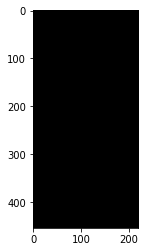

In [35]:
new_mask=(volume.copy()).astype(int16)
new_mask[new_mask < -100] = 0
new_mask[new_mask > -60] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')

In [37]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

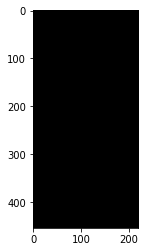

In [43]:
new_mask1=(volume.copy()).astype(int16)
new_mask1[new_mask1 < 40] = 0
new_mask1[new_mask1 > 80]=0

plt.imshow(new_mask1[:, 100, :], cmap='gray')

In [39]:
# TODO: YOUR CODE TO SEGMENT BONES

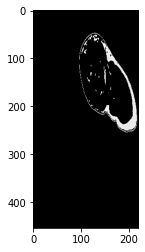

In [45]:
new_mask2=(volume.copy()).astype(int16)
new_mask2[new_mask2 < 400] = 0
new_mask2[new_mask2 > 1000] = 0

plt.imshow(new_mask2[:, 100, :], cmap='gray')

In [41]:
# Are the segmentations good?

Unfortunately, my segmentations didn't work out too well. Perhaps I am not coding it correctly, but using the Houndfield range from class for each particular type of tissue, I was not able to see anything for fat and soft tissues. While I was able to see something in bones, the parts that are white doesn't seem to correspond to the locations of the actual bones in the arm. 

In [42]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""